# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Audy Febryanti
- **Email:** audyfbrynti@gmail.com
- **ID Dicoding:** oddzcv

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap penyewaan sepeda?
2. Bagaimana pengaruh hari libur terhadap penyewaan sepeda?
3. Pada hari kerja, pukul berapa penyewaan sepeda tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Memuat tabel day

In [6]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Memuat tabel hour

In [7]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Menilai data day.csv

Memeriksa tipe data

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tipe data dteday seharusnya datetime, bukan object

Mengecek missing values

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing values

Mengecek duplikasi data

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data yang sama

Mengecek parameter statistik dari kolom numerik yang terdapat dalam day_df

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Parameter statistik terlihat tidak ada masalah

- Menilai data hour.csv

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data dteday seharusnya datetime, bukan object

In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing values

Mengecek duplikasi data

In [14]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data yang sama

Mengecek parameter statistik dari kolom numerik yang terdapat dalam hour_df

In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Parameter statistik terlihat tidak ada masalah

### Cleaning Data

**Membersihkan data day.csv**

Memperbaiki nama kolom pada day_df

In [16]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

Mapping nilai kolom dari angka menjadi keterangan

In [17]:
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [18]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

In [19]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [20]:
day_df['holiday'] = day_df['holiday'].map({
    0: 'Not Holiday', 1: 'Holiday'
})

Memperbaiki tipe data dateday

In [21]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])

Memperbaiki tipe data season, year, month, holiday, weekday, workingday 

In [22]:
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')

In [23]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,Not Holiday,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,Not Holiday,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,Not Holiday,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,Not Holiday,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,Not Holiday,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

 Tipe data sudah diperbaiki

**Membersihkan data hour.csv**

Memperbaiki nama kolom di hour_df

In [25]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count',
    'hr': 'hour'
}, inplace=True)

Mapping nilai kolom dari angka menjadi keterangan

In [26]:
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [27]:
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

In [28]:
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [29]:
hour_df['holiday'] = hour_df['holiday'].map({
    0: 'Not Holiday', 1: 'Holiday'
})

Memperbaiki tipe data dateday

In [30]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])


Memperbaiki tipe data season, year, month, holiday, weekday, workingday

In [31]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')

In [32]:
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Not Holiday,Sat,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,Not Holiday,Sat,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,Not Holiday,Sat,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,Not Holiday,Sat,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,Not Holiday,Sat,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

Tipe data sudah diperbaiki

## Exploratory Data Analysis (EDA)

**Eksplorasi data day_df**

In [34]:
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2,7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,1.0,Aug,Not Holiday,Mon,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710,105,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat data penyewaan sepeda berdasarkan season (musim)

In [35]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\1684961253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


instant count                                
       nunique   max   min         mean          std
season                                              
Fall       188  8714  1115  5644.303191  1459.800381
Spring     181  7836   431  2604.132597  1399.942119
Summer     184  8362   795  4992.331522  1695.977235
Winter     178  8555    22  4728.162921  1699.615261

In [36]:
day_df.groupby('season')[['registered', 'casual', 'count']].sum().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\3346867128.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season')[['registered', 'casual', 'count']].sum().reset_index()


,season,registered,casual,count
0,Fall,835038,226091,1061129
1,Spring,410726,60622,471348
2,Summer,715067,203522,918589
3,Winter,711831,129782,841613


Berdasarkan pivot table di atas, dapat diketahui bahwa penyewaan sepeda paling banyak saat musim gugur (fall). 

Melihat data penyewaan sepeda berdasarkan holiday (hari libur)

In [37]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\3463524268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="holiday").agg({


instant count                                
            nunique   max   min         mean          std
holiday                                                  
Holiday          21  7403  1000  3735.000000  2103.350660
Not Holiday     710  8714    22  4527.104225  1929.013947

In [38]:
day_df.groupby('holiday')[['registered', 'casual', 'count']].sum().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\4000661929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('holiday')[['registered', 'casual', 'count']].sum().reset_index()


,holiday,registered,casual,count
0,Holiday,56076,22359,78435
1,Not Holiday,2616586,597658,3214244


Berdasarkan pivot table di atas, dapat diketahui bahwa penyewaan sepeda di hari kerja (not holiday) lebih banyak dibandingkan di hari libur (holiday).

**Eksplorasi data hour_df**

In [39]:
hour_df.describe(include="all")

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,NaN,2,7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,1.0,Jul,NaN,Not Holiday,Sat,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,NaN,16879,2512,11865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Melihat penyewaan sepeda tiap jam di hari kerja

In [40]:
on_workingday = hour_df[(hour_df["workingday"]) == 1]

on_workingday.groupby(by='hour').agg({
    'count': ["max", "min", "mean", "std"]
})

count                            
       max min        mean         std
hour                                  
0      283   2   36.786290   24.467143
1      114   1   16.552632   11.680338
2       74   1    8.683778    6.563915
3       36   1    4.942553    3.403074
4       17   1    5.429787    3.129468
5       66   1   24.913131   12.281389
6      213   7  102.500000   45.812662
7      596  18  290.612903  134.558250
8      839  31  477.006048  186.153760
9      426  23  241.518145   85.705861
10     275   8  135.366935   55.679335
11     361  10  158.229839   69.173911
12     471   3  200.820926   89.264976
13     428  11  198.429719   88.476850
14     651  12  183.572289   87.257014
15     601  13  201.331325   97.639817
16     634  13  293.122244  132.798845
17     976  26  525.290581  228.761046
18     977  26  492.226908  220.258168
19     743  18  348.401606  160.490857
20     567  23  249.718876  120.340635
21     398   6  186.287149   87.831120
22     321  11  138.389558   67.549347
23     256   9   88.708835   48.857465

In [41]:
hour_on_workingday = on_workingday.groupby('hour')[['registered', 'casual', 'count']].sum().reset_index()
hour_on_workingday.sort_values(by='count', ascending=False)

,hour,registered,casual,count
17,17,233729,28391,262120
18,18,220004,25125,245129
8,8,225552,11043,236595
19,19,153075,20429,173504
16,16,122144,24124,146268
7,7,138095,6049,144144
20,20,108738,15622,124360
9,9,107734,12059,119793
15,15,77189,23074,100263
12,12,79253,20555,99808


Berdasarkan pivot table di atas, dapat diketahui bahwa penyewaan sepeda di hari kerja paling sering pada pukul 17 atau 5 sore.

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh musim terhadap penyewaan sepeda?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\2169248065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt_season = day_df.groupby('season')[['registered', 'casual', 'count']].sum().reset_index()


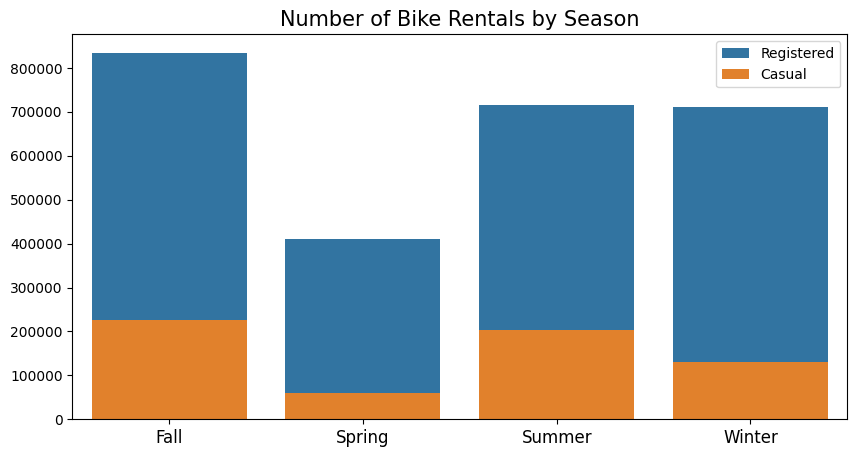

In [42]:
plt_season = day_df.groupby('season')[['registered', 'casual', 'count']].sum().reset_index()

plt.figure(figsize=(10,5))

sns.barplot(
    y="registered",
    x="season",
    data=plt_season,
    color='tab:blue',
    label='Registered'
)

sns.barplot(
    y="casual",
    x="season",
    data=plt_season,
    color='tab:orange',
    label='Casual'
)

plt.title("Number of Bike Rentals by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

Bagaimana pengaruh hari libur terhadap penyewaan sepeda?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\3369343557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt_holiday = day_df.groupby('holiday')[['registered', 'casual', 'count']].sum().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\3369343557.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


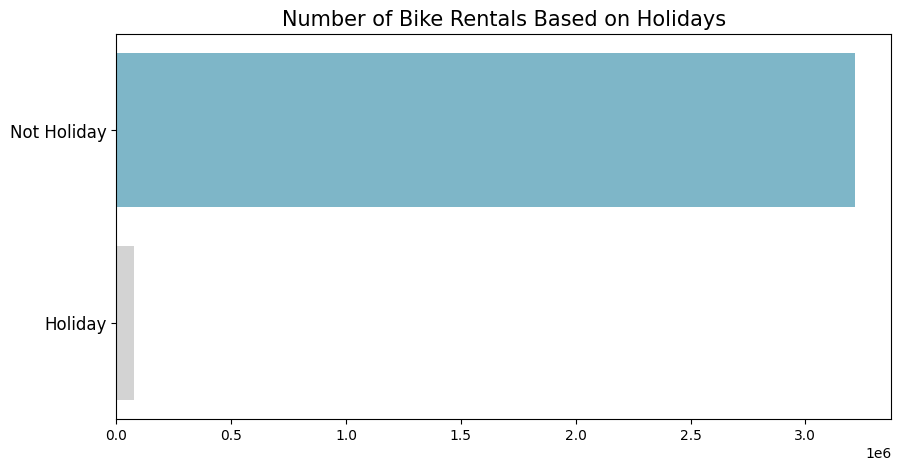

In [43]:
plt_holiday = day_df.groupby('holiday')[['registered', 'casual', 'count']].sum().reset_index()

plt.figure(figsize=(10,5))

colors_ = ["#72BCD4", "#D3D3D3"]

sns.barplot(
    y="holiday",
    x="count",
    data=plt_holiday,
    palette=colors_,
    order=plt_holiday.sort_values(by=["count"], ascending=False)["holiday"]
)

plt.title("Number of Bike Rentals Based on Holidays", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3

Pada hari kerja, pukul berapa penyewaan sepeda tinggi?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\3426447949.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


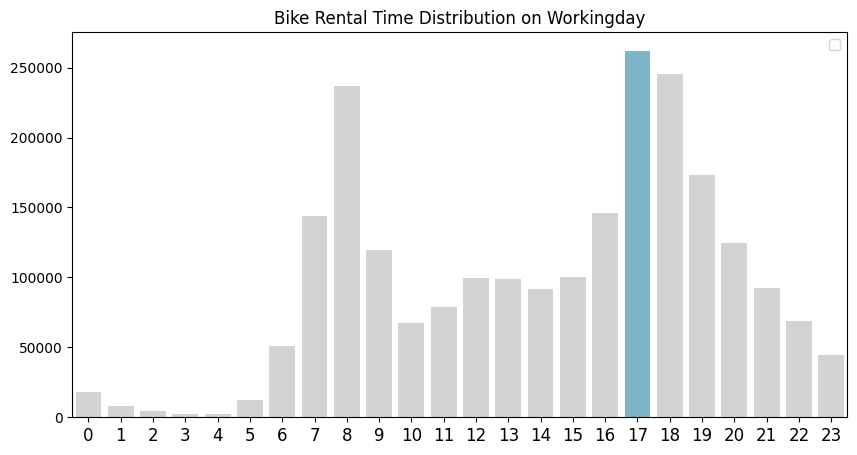

In [44]:
plt_hour_workingday = hour_on_workingday.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 5))

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    data=plt_hour_workingday, 
    x='hour', 
    y='count',
    palette=colors
)

plt.title("Bike Rental Time Distribution on Workingday")
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Penyewaan sepeda terjadi paling sering pada musim gugur (fall).
- Penyewaan sepeda di hari kerja (not holiday) jauh lebih banyak dibanding ketika hari libur (holiday).
- Pada hari kerja, penyewaan sepeda paling banyak pada pukul 17.00 atau 5 sore.

## RFM Analysis

In [45]:
rfm_df = hour_df.groupby(by="hour", as_index=False).agg({
    "dateday": "max", # mengambil tanggal penyewaan sepeda terakhir
    "instant": "nunique", # menghitung jumlah penyewaan sepeda
    "count": "sum" # menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["hour", "last_order_date", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = hour_df["dateday"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("last_order_date", axis=1, inplace=True)
rfm_df.head(5)

,hour,frequency,monetary,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\4251560293.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="hour", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\4251560293.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="hour", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4712\4251560293.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

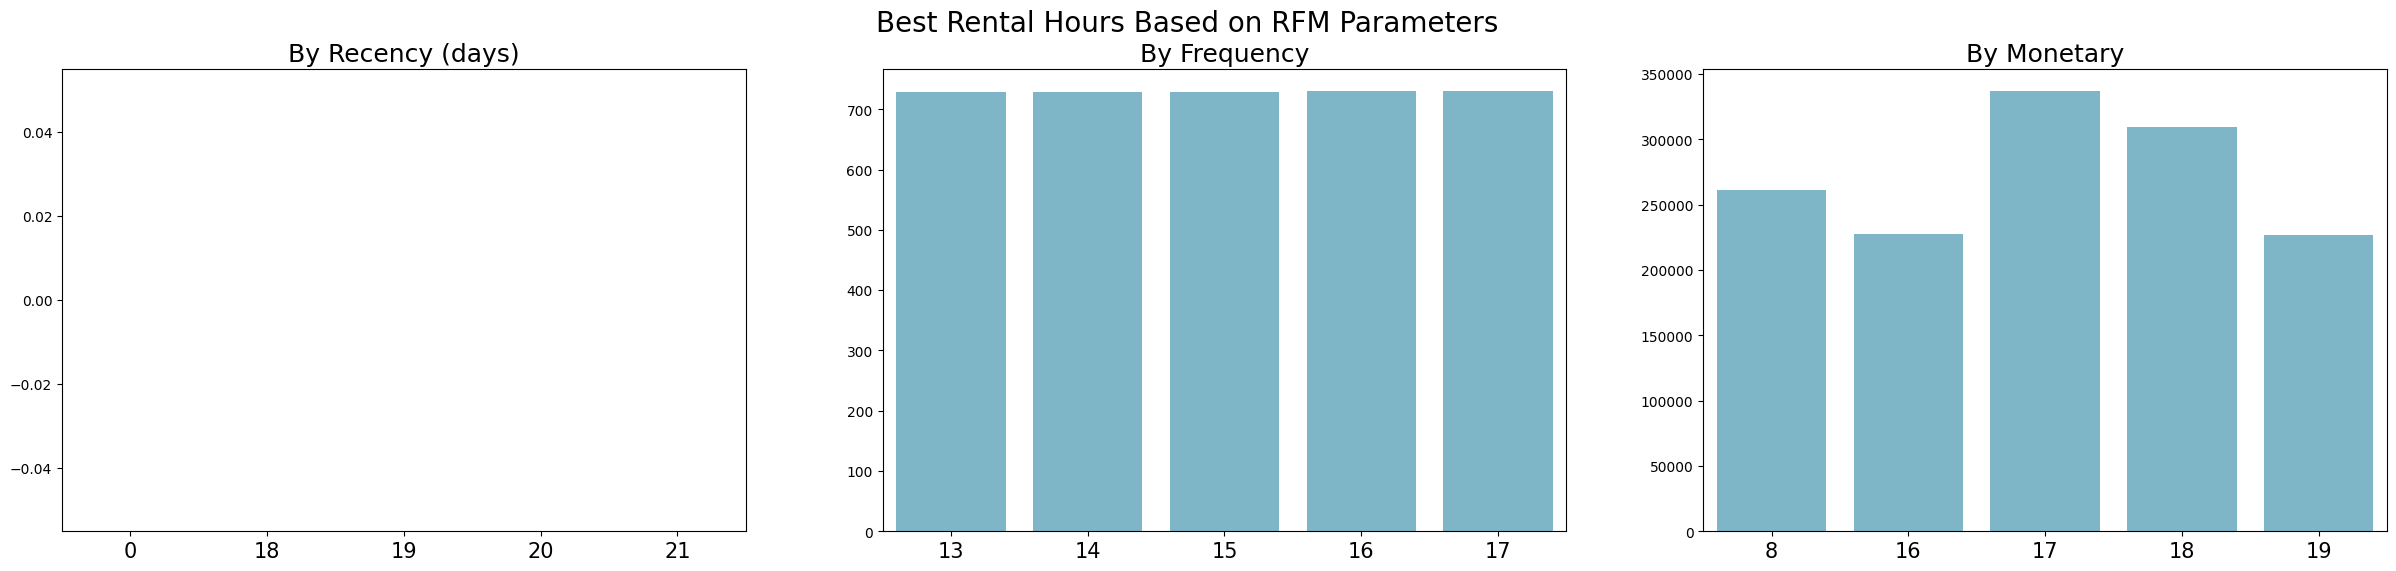

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="hour", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="hour", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="hour", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Rental Hours Based on RFM Parameters", fontsize=20)
plt.show()

In [47]:
hour_df.to_csv("main_data.csv", index=False)